In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import sklearn

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


visualise data, clustering and all, linear regression, removing outliers

In [34]:
df=pd.read_csv("/kaggle/input/cleaned-data-movie-reviews/cleaned_data.csv")

given a data frame regarding movie data with each row having the following attributes - budget, revenue, release date(dd/mm/yy), vote_average (0-10 and can be decimal )and genres, try and visualize and find patterns in the datausing numpy, pandas, and scikit learn.

the genres column is basically a list of dictionary with each dictionary having the followig pattern : {'id': x,'name':y} where x is a number and y is the genre name associated with that id.

try and make a model using simple techniques like regression, decision treesm random forest, clustering to predict that given a release date, which genre or mix of genres should the studio produce at that time of the year for better success based on budget revenue and vote average

In [35]:
df

,budget,genres,revenue,release_date,vote_average
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",373554033.0,1995-10-30,7.7
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",262797249.0,1995-12-15,6.9
2,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",81452156.0,1995-12-22,6.1
3,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",187436818.0,1995-12-15,7.7
4,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",64350171.0,1995-12-22,5.5
...,...,...,...,...,...
5358,12000000,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",19000000.0,2007-06-14,6.9
5359,750000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",3.0,2014-06-05,6.0
5360,800000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1328612.0,2006-11-23,5.8
5361,2000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",1268793.0,2010-09-30,4.0


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import MultiLabelBinarizer

ModuleNotFoundError: No module named 'seaborn'

budget and revenue relationship

In [37]:
df['release_date']

0       1995-10-30
1       1995-12-15
2       1995-12-22
3       1995-12-15
4       1995-12-22
           ...    
5358    2007-06-14
5359    2014-06-05
5360    2006-11-23
5361    2010-09-30
5362    2007-09-06
Name: release_date, Length: 5363, dtype: object

In [40]:
# Convert release date to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract release month and year as separate columns
df['release_month'] = df['release_date'].dt.month
df['release_year'] = df['release_date'].dt.year

# Drop unnecessary columns
df.drop(['release_date'], axis=1, inplace=True)

# Check for and handle missing values
df.dropna(inplace=True)  # Remove rows with any missing values


In [41]:
df.head()

,budget,genres,revenue,vote_average,release_month,release_year
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",373554033.0,7.7,10,1995
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",262797249.0,6.9,12,1995
2,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",81452156.0,6.1,12,1995
3,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",187436818.0,7.7,12,1995
4,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",64350171.0,5.5,12,1995


In [42]:
import seaborn as sns

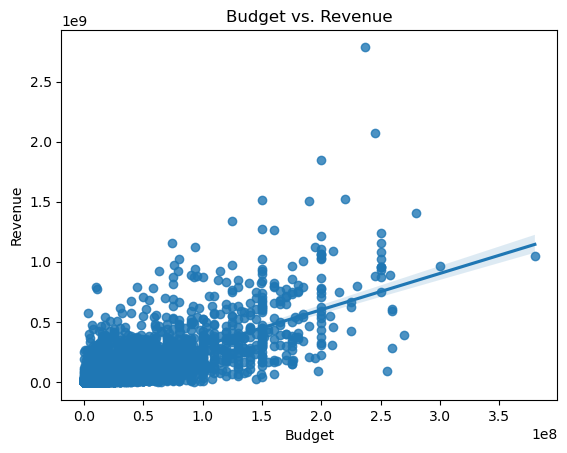

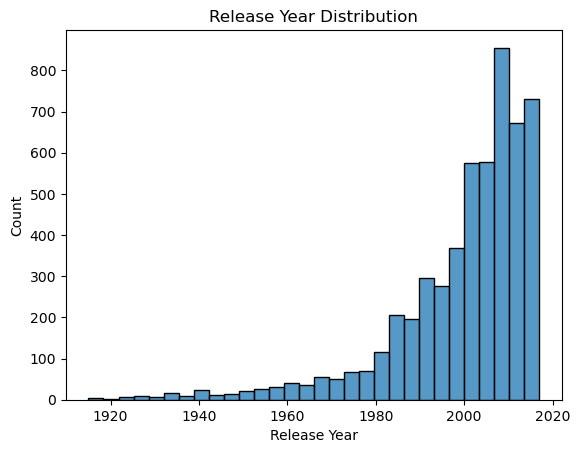

In [43]:
# Scatter plot: Budget vs. Revenue
sns.regplot(data=df, x='budget', y='revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Budget vs. Revenue')
plt.show()

# Histogram: Release Year Distribution
sns.histplot(data=df, x='release_year', bins=30)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Release Year Distribution')
plt.show()



In [50]:
import ast

In [53]:
# Step 2: Extract Genre from List of Dictionaries
df['genres'] = df['genres'].apply(lambda x: [genre['name'] for genre in eval(x)])


In [55]:
df['genres']

0            [Animation, Comedy, Family]
1           [Adventure, Fantasy, Family]
2               [Comedy, Drama, Romance]
3       [Action, Crime, Drama, Thriller]
4          [Action, Adventure, Thriller]
                      ...               
5358             [Action, Comedy, Drama]
5359                     [Crime, Comedy]
5360                     [Comedy, Drama]
5361                    [Romance, Drama]
5362    [Action, Comedy, Crime, Foreign]
Name: genres, Length: 5363, dtype: object

In [56]:
mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb.fit_transform(df['genres']), columns=mlb.classes_)
df = pd.concat([df, genres_encoded], axis=1)
df.drop('genres', axis=1, inplace=True)

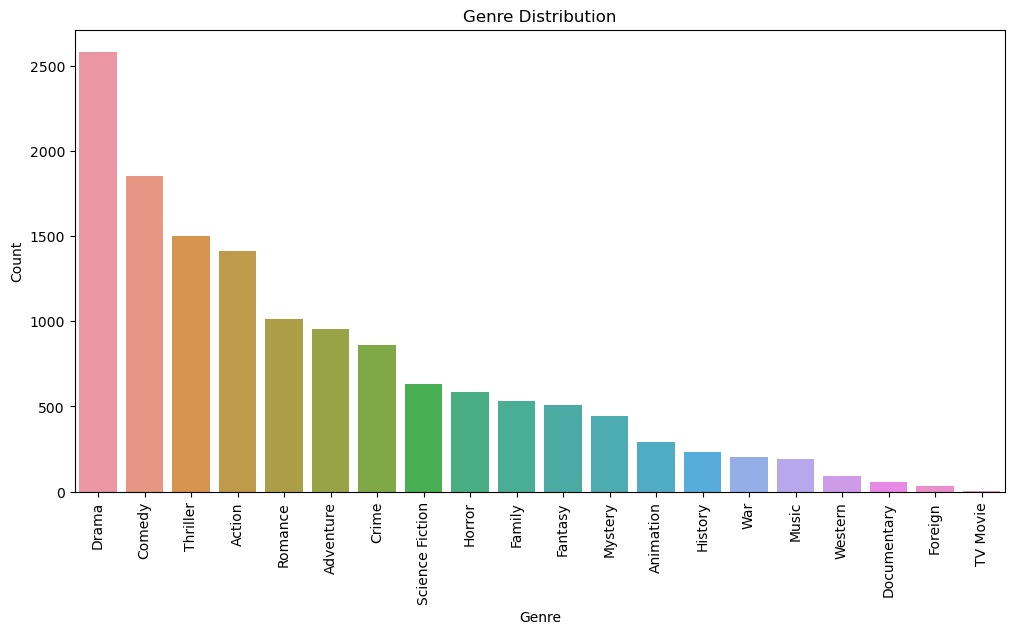

In [58]:
genre_columns = mlb.classes_
genre_counts = df[genre_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution')
plt.xticks(rotation=90)
plt.show()

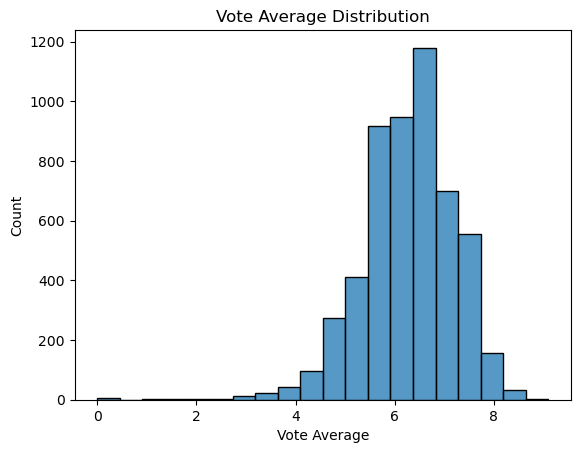

In [63]:
# Vote Average Distribution
sns.histplot(data=df, x='vote_average', bins=20)
plt.xlabel('Vote Average')
plt.ylabel('Count')
plt.title('Vote Average Distribution')
plt.show()

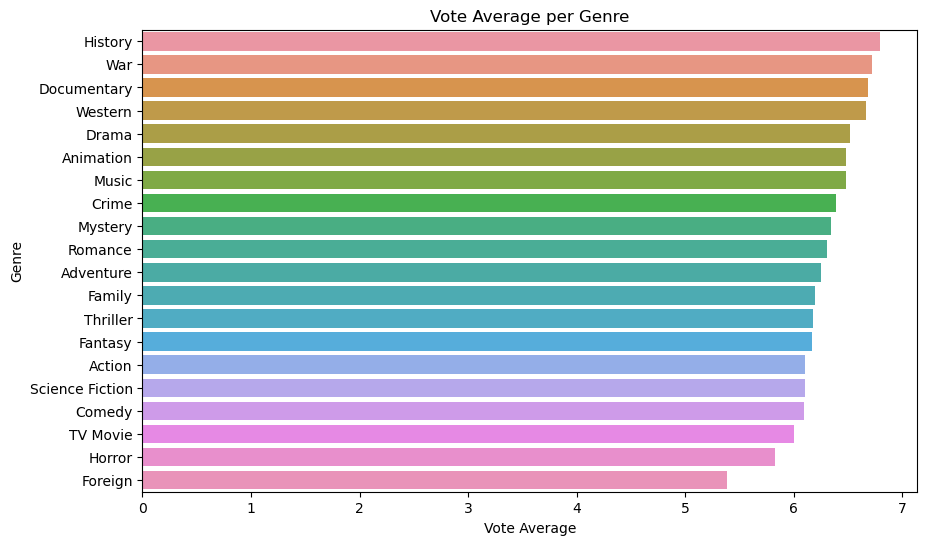

In [69]:
# Vote Average per Genre
genre_columns = mlb.classes_
genre_vote_avg = {}

for genre in genre_columns:
    genre_movies = df[df[genre] == 1]
    genre_vote_avg[genre] = genre_movies['vote_average'].mean()

genre_vote_avg = pd.Series(genre_vote_avg).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_vote_avg.values, y=genre_vote_avg.index)
plt.xlabel('Vote Average')
plt.ylabel('Genre')
plt.title('Vote Average per Genre')
plt.show()

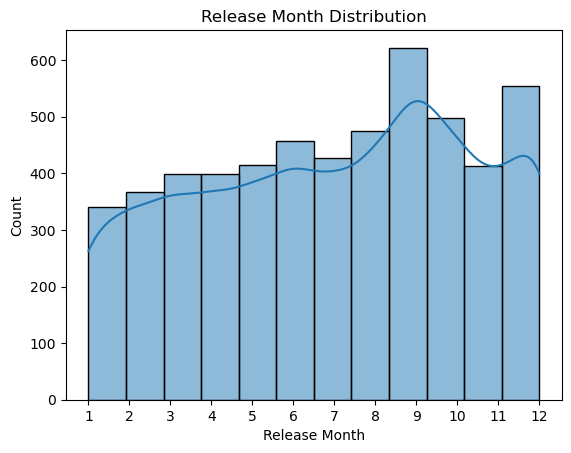

In [71]:
#release mont distribution
sns.histplot(data=df, x='release_month', bins=12, kde=True)
plt.xlabel('Release Month')
plt.ylabel('Count')
plt.title('Release Month Distribution')
plt.xticks(np.arange(1, 13))
plt.show()


/tmp/ipykernel_32/3462535296.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='release_year', y='vote_average', ci=None)


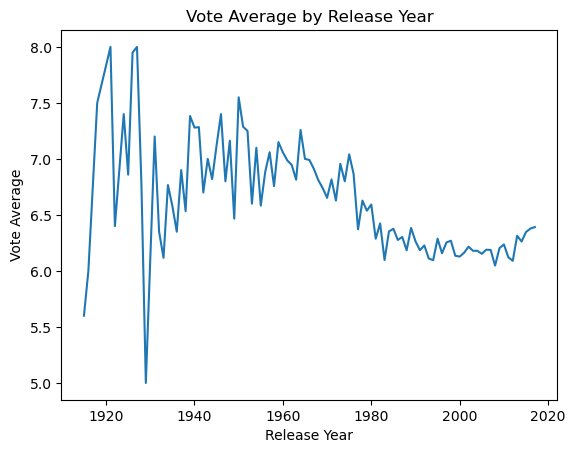

In [72]:
#vote average per year
sns.lineplot(data=df, x='release_year', y='vote_average', ci=None)
plt.xlabel('Release Year')
plt.ylabel('Vote Average')
plt.title('Vote Average by Release Year')
plt.show()


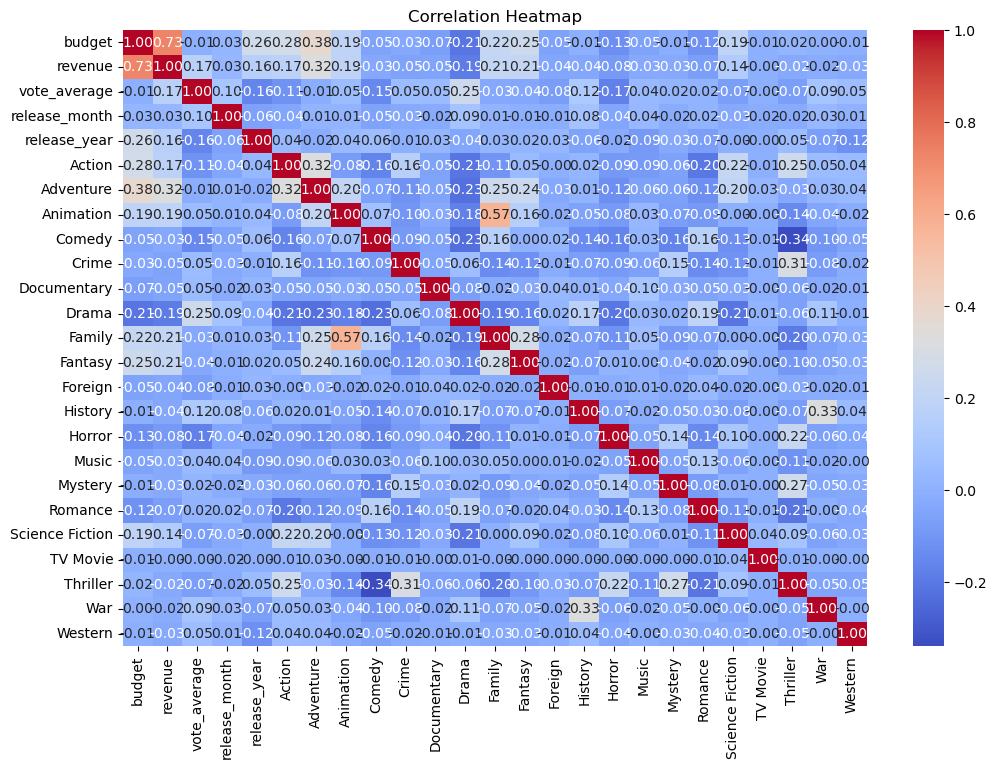

In [73]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


<Figure size 1200x800 with 0 Axes>

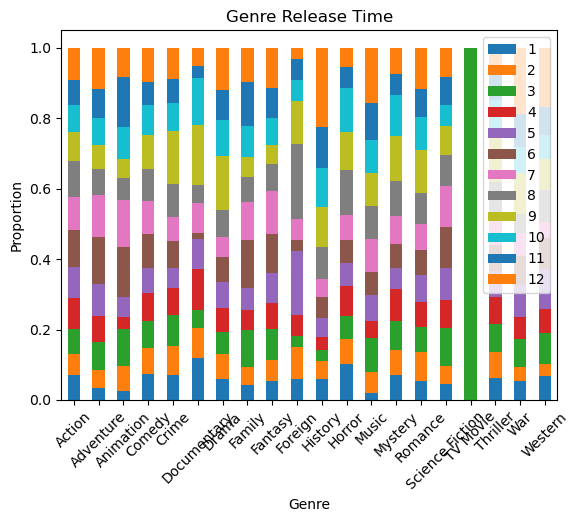

In [74]:
# This plot provides insights into the distribution of movie genres over different months, highlighting the genres that are more popular during specific times of the year. where 1-12 are the months of the year
genre_columns = mlb.classes_
genre_release_counts = df.groupby('release_month')[genre_columns].sum().T
genre_release_counts = genre_release_counts.div(genre_release_counts.sum(axis=1), axis=0)  # Normalize by total count per genre

plt.figure(figsize=(12, 8))
genre_release_counts.plot(kind='bar', stacked=True)
plt.xlabel('Genre')
plt.ylabel('Proportion')
plt.title('Genre Release Time')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

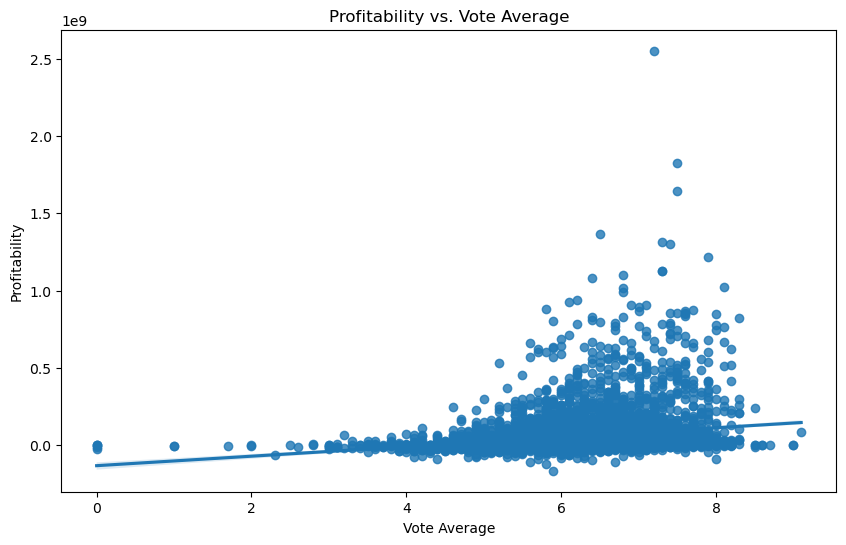

Correlation between Vote Average and Profitability: 0.20193548548849075


In [85]:
df['profitability'] = df['revenue'] - df['budget']


# Step 3: Plot Profitability vs Vote Average
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='vote_average', y='profitability')
plt.xlabel('Vote Average')
plt.ylabel('Profitability')
plt.title('Profitability vs. Vote Average')
plt.show()

# Step 4: Calculate Correlation
correlation = df['vote_average'].corr(df['profitability'])
print('Correlation between Vote Average and Profitability:', correlation)

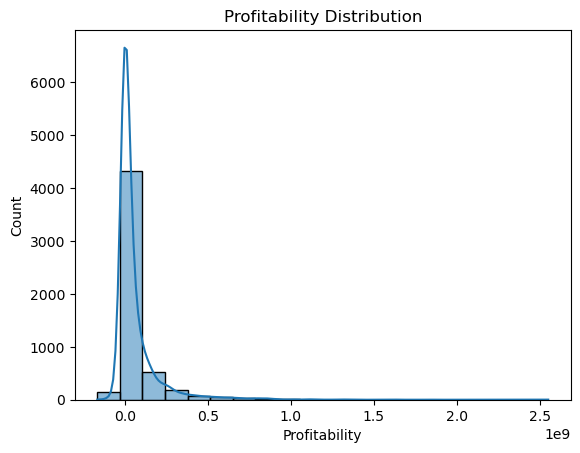

In [91]:
# Profitability Distribution
sns.histplot(data=df, x='profitability', bins=20,kde=True)
plt.xlabel('Profitability')
plt.ylabel('Count')
plt.title('Profitability Distribution')
plt.show()


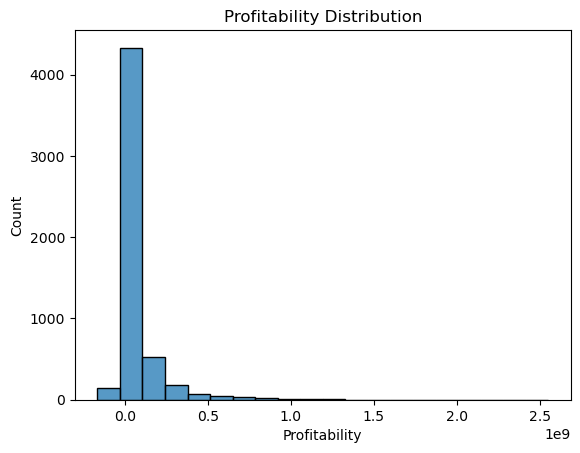

Percentage of Movies in Each Profitability Range:
<0         30.151035
50M+       28.733918
20M-50M    13.798247
0-5M       12.194667
10M-20M     8.726459
5M-10M      6.395674
Name: profitability_range, dtype: float64


In [92]:
sns.histplot(data=df, x='profitability', bins=20)
plt.xlabel('Profitability')
plt.ylabel('Count')
plt.title('Profitability Distribution')
plt.show()

# Step 4: Calculate Ranges and Percentages
profitability_ranges = [-float('inf'), 0, 5000000, 10000000, 20000000, 50000000, float('inf')]
range_labels = ['<0', '0-5M', '5M-10M', '10M-20M', '20M-50M', '50M+']

df['profitability_range'] = pd.cut(df['profitability'], bins=profitability_ranges, labels=range_labels)
percentage_per_range = df['profitability_range'].value_counts(normalize=True) * 100

print('Percentage of Movies in Each Profitability Range:')
print(percentage_per_range)

/tmp/ipykernel_32/1254237294.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='release_year', y='profitability', ci=None)


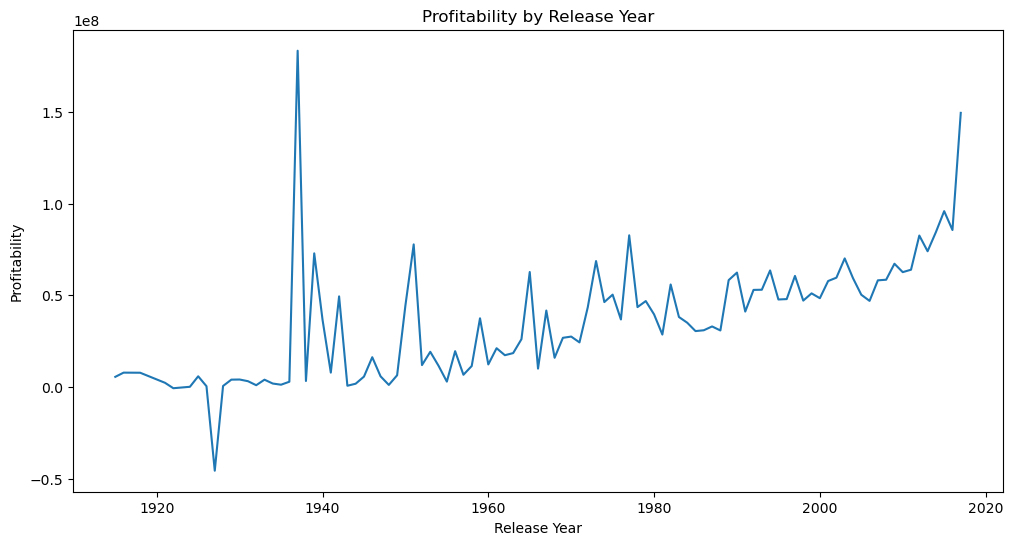

In [89]:
#profitabilty by releae year
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='release_year', y='profitability', ci=None)
plt.xlabel('Release Year')
plt.ylabel('Profitability')
plt.title('Profitability by Release Year')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


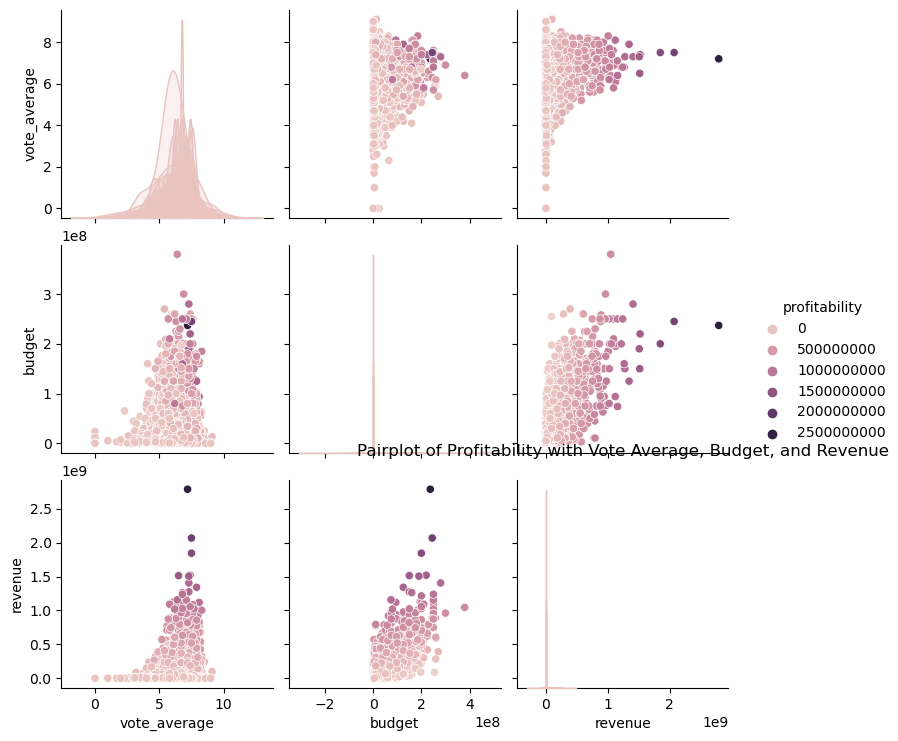

In [90]:
sns.pairplot(data=df, vars=['vote_average', 'budget', 'revenue'], hue='profitability')
plt.title('Pairplot of Profitability with Vote Average, Budget, and Revenue')
plt.show()


In [81]:
df[genre_columns].sum(axis='columns')

0       3
1       3
2       3
3       4
4       3
       ..
5358    3
5359    2
5360    2
5361    2
5362    4
Length: 5363, dtype: int64

In [86]:
df.columns

Index(['budget', 'revenue', 'vote_average', 'release_month', 'release_year',
       'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western', 'profitability'],
      dtype='object')

**MODEL**

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [96]:
len(genre_columns)

20

In [105]:
print(len(X))

5363


In [106]:
print(len(y_profitable))
print(len(y_concatenated))

5363
5363


In [154]:
from sklearn.pipeline import make_pipeline
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import StandardScaler
import ast
from sklearn.ensemble import RandomForestClassifier

In [126]:
a=pd.DataFrame({'a':[1,2,3],'b':[1,2,4]})

In [127]:
a

,a,b
0,1,1
1,2,2
2,3,4


In [128]:
a.iloc[0][0]=100

In [129]:
a

,a,b
0,100,1
1,2,2
2,3,4


In [130]:
print(len(y.iloc[0]))

20


In [159]:
# Step 5: Model Building and Evaluation
X = df[['budget', 'release_year', 'release_month']]
y = df[mlb.classes_]
# Convert profitability to binary label: profitable (1) or non-profitable (0)
df['profitable'] = np.where(df['profitability'] >= 0, 1, 0)
y_profitable = df['profitable']
# print(y)

for i in range(len(y_profitable)):
    if(y_profitable[i]==0):
        for j in range(len(y.iloc[i])):
            y.iloc[i][j]=0


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier for Genre Prediction
dt_model = MultiOutputClassifier(DecisionTreeClassifier())
dt_model.fit(X_train, y_train)

# Logistic Regression Classifier for Genre Prediction
logreg_model = make_pipeline(StandardScaler(), MultiOutputClassifier(LogisticRegression()))
logreg_model.fit(X_train, y_train)

rf_model = MultiOutputClassifier(RandomForestClassifier())
rf_model.fit(X_train, y_train)

# # Step 6: Predict Genre for New Release Year, Month, and Budget
# new_release_year = 2023
# new_release_month = 7
# new_budget = 50000000

# new_data = pd.DataFrame({'budget': [new_budget], 'release_year': [new_release_year], 'release_month': [new_release_month]})

# # Predict Genre using Decision Tree Classifier
# dt_genre_probabilities = dt_model.predict_proba(new_data)
# dt_predicted_genre = mlb.classes_[np.argmax(dt_genre_probabilities[0])]

# # Predict Genre using Logistic Regression Classifier
# logreg_genre_probabilities = logreg_model.predict_proba(new_data)
# logreg_predicted_genre = mlb.classes_[np.argmax(logreg_genre_probabilities[0])]

# # Check if the Predicted Genre is Profitable
# predicted_profitable = df[df['profitable'] == True][dt_predicted_genre].sum() > 0

# Calculate Accuracy and F1 Score
dt_predictions = dt_model.predict(X_test)
logreg_predictions = logreg_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
# dt_accuracy = accuracy_score(y_test, dt_predictions)
# logreg_accuracy = accuracy_score(y_test, logreg_predictions)

dt_f1_score = f1_score(y_test, dt_predictions, average='weighted')
logreg_f1_score = f1_score(y_test, logreg_predictions, average='weighted')
rf_f1_score=f1_score(y_test,rf_predictions,average='weighted')
# print('Decision Tree Classifier - Accuracy:', dt_accuracy)
print('Decision Tree Classifier - F1 Score:', dt_f1_score)

# print('Logistic Regression Classifier - Accuracy:', logreg_accuracy)
print('Logistic Regression Classifier - F1 Score:', logreg_f1_score)

print('Random Forest Regression Classifier - F1 Score:', rf_f1_score)

# print('Predicted Genre (Decision Tree Classifier):', dt_predicted_genre)
# print('Predicted Genre (Logistic Regression Classifier):', logreg_predicted_genre)
# print('Predicted Profitable:', predicted_profitable)

Decision Tree Classifier - F1 Score: 0.2331038243175123
Logistic Regression Classifier - F1 Score: 0.07439158235557244
Random Forest Regression Classifier - F1 Score: 0.18761299593407554


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [160]:
dt_predictions

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

accuracy

In [164]:
dt_pred=0
logreg_pred=0
length=0
acc_dt=0
acc_logreg=0
acc_rf=0
rf_pred=0
for i in range(len(y_test)):
    if(df['profitable'][y_test.index[i]]==1):
        length+=1
    for j in range(len(y_test.iloc[i])):
        if(y_test.iloc[i][j]==1 and dt_predictions[i][j]==1):
            dt_pred+=1
            break
    for j in range(len(y_test.iloc[i])):
        if(y_test.iloc[i][j]==1 and logreg_predictions[i][j]==1):
            logreg_pred+=1
            break
    for j in range(len(y_test.iloc[i])):
        if(y_test.iloc[i][j]==1 and rf_predictions[i][j]==1):
            rf_pred+=1
            break
acc_dt=dt_pred/length
acc_logreg=logreg_pred/length
acc_rf=rf_pred/length
print('Decision Tree Classifier - Accuracy:', acc_dt)
print('Logistic Regression Classifier - Accuracy:', acc_logreg)  
print('Random Forest Classifier - Accuracy:', acc_rf)  

Decision Tree Classifier - Accuracy: 0.45539280958721706
Logistic Regression Classifier - Accuracy: 0.07723035952063914
Random Forest Classifier - Accuracy: 0.28894806924101196


we are just checking for whether the genre is profitable, if there is a certain profit target, then we can alternatively modify the model in the future so as to see whether that forecasted range of profit can be achieved or not